## <font color='indianred' face='Verdana'>TITANIC DATA ANALYSIS PROJECT</font>
### <font color='grey' face='Verdana'> Data analysis of Titanic dataset to know more about the people onboard and try to get insight on the survival rates of the individuals.</font>

In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv("titanic_train.csv")

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- **Sibsp**: Siblings on board (1: true and 0: False )
- **Parch**: Parents with childrens (1 and 0)

In [4]:
# Describe the variables present in the dataset with their mean, modes and other statistics.

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### <font color='indianred' face='Verdana'>What are the questions we need to answer?</font>

#### Basic questions:
1) What are the passengers on the titanic(Ages, Gender, class etc.)
2) What deck were the passengers on and how does that relate to their class?
3) Where did the passengers come from?
4) Who was alone and who was with family?


#### Digging deeper with broader question
1) What factors helped someone survive the sinking?

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Ankit Panda\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ankit Panda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


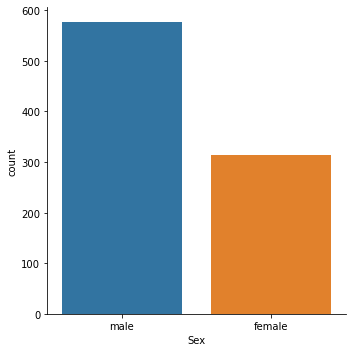

In [6]:
# Lets try to understand gender column

sns.factorplot('Sex', kind='count', data=titanic_df)  

C:\Users\Ankit Panda\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ankit Panda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


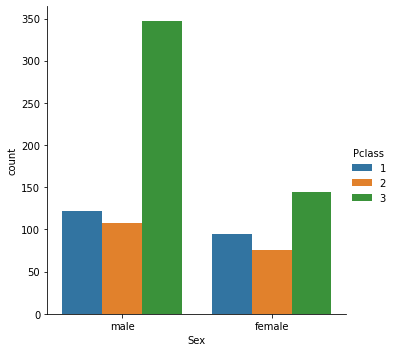

In [7]:
# Separating the Sex further into the classes that they belong to

sns.factorplot('Sex', hue='Pclass', kind='count', data=titanic_df)

C:\Users\Ankit Panda\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ankit Panda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


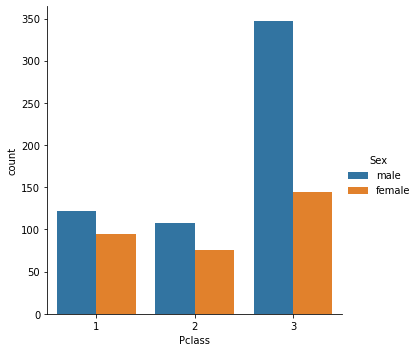

In [8]:
# Now lets see the how many people are there in different classes based on their gender

sns.factorplot('Pclass', hue='Sex', kind='count', data=titanic_df)

- <font color='Purple' face='Verdana'>**Conclusion**</font>: The first two classes are somewhat evenly distributed but the class 3 has way more male than female.

In [9]:
# Trying to get more information from the age class to know about childrens present.

def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [10]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [11]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


C:\Users\Ankit Panda\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ankit Panda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


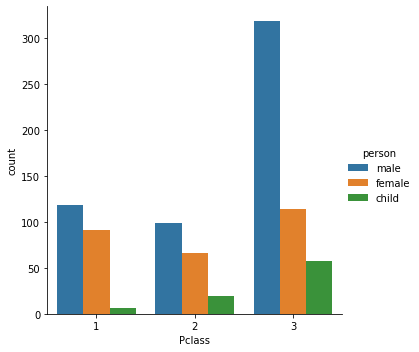

In [12]:
# Make a factorplot one more time and separate this on the basis of person

sns.factorplot('Pclass', data=titanic_df, hue='person', kind='count')

<AxesSubplot:>

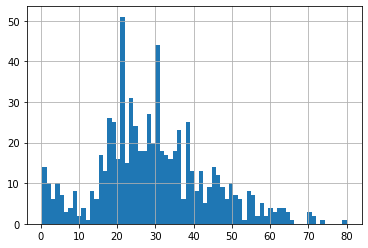

In [13]:
# Lets see a distribution for ages in the titanic column

titanic_df['Age'].hist(bins=70)

In [14]:
# Get the mean age of people on titanic

" The mean age is: {}.".format(titanic_df['Age'].mean())

' The mean age is: 29.69911764705882.'

In [15]:
# Get the numbers of male, female and childrens on titanic

titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

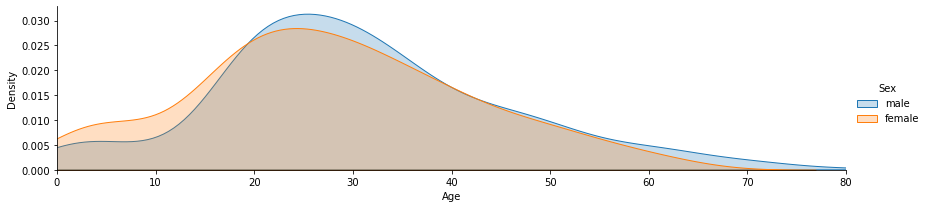

In [16]:
# Using FacetGrid it allows one to draw multiple figures in same plot

fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)  # fig is here a plot object that we created

# Creating multiple kde plots in single plot
fig.map(sns.kdeplot, 'Age', shade=True)

# Setting the oldest and the youngest as the age limits in our kde plots
oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()


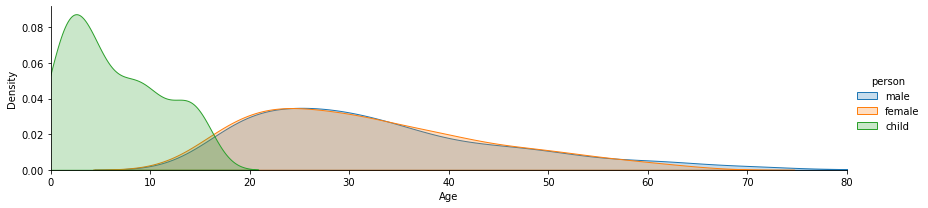

In [17]:
# Using FacetGrid it allows one to draw multiple figures in same plot here the only change is in hue

fig = sns.FacetGrid(titanic_df, hue='person', aspect=4)  # fig is here a plot object that we created

# Creating multiple kde plots in single plot
fig.map(sns.kdeplot, 'Age', shade=True)

# Setting the oldest and the youngest as the age limits in our kde plots
oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

- NOTE: kde plots are subject to bandwidths that's why our plots for children are going beyond 16 up until 20.

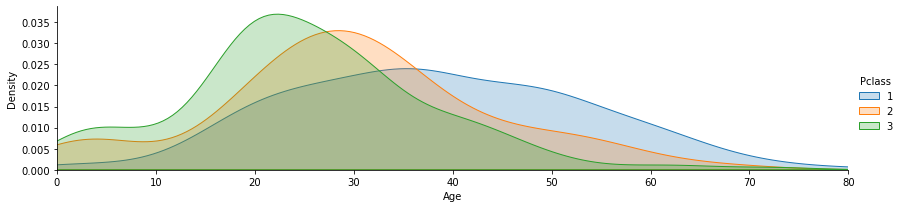

In [18]:
# Using FacetGrid it allows one to draw multiple figures in same plot but here we will set the hue as class column

fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)  # fig is here a plot object that we created

# Creating multiple kde plots in single plot
fig.map(sns.kdeplot, 'Age', shade=True)

# Setting the oldest and the youngest as the age limits in our kde plots
oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [19]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [20]:
# Very few rows are avaialable for the cabin column lets check it:
titanic_df['Cabin'].isnull().sum()

687

In [21]:
# We have to drop the cabin column as most of the values are null.

deck = titanic_df['Cabin'].dropna()

deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

C:\Users\Ankit Panda\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ankit Panda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


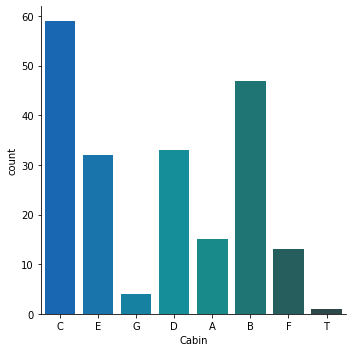

In [22]:
# We have the decks as the first values in our deck column so we need to pull it out
# Problem: Loop through the deck to grab the first letter

levels = []

for element in deck:
    levels.append(element[0])
    
cabin_df = DataFrame(levels)

cabin_df.columns = ['Cabin']

sns.factorplot("Cabin", kind='count', data=cabin_df, palette='winter_d')   # Go to matplotlib colormaps for more idea [palettes]
                                                                           # _d will make colormap darker.


C:\Users\Ankit Panda\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ankit Panda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


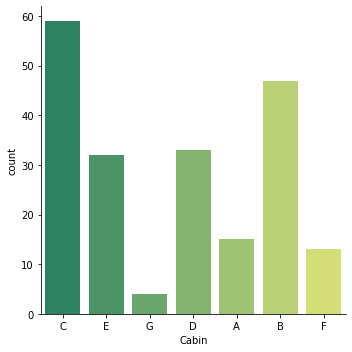

In [23]:
# Above plot we can see that T cabin does not make that much sense so we can drop it.
# Problem: Drop the cabin t from the cabin_df

cabin_df = cabin_df[cabin_df.Cabin !='T']

sns.factorplot("Cabin", kind='count', data=cabin_df, palette='summer')

C:\Users\Ankit Panda\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ankit Panda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


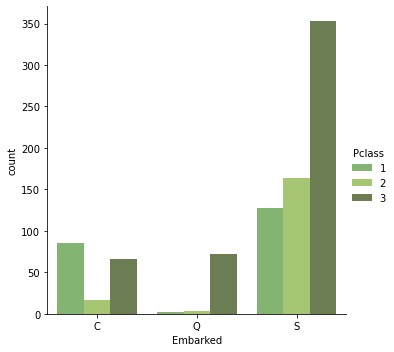

In [24]:
# Deep diving into the embarked column to see that the values are the names of the town from where the passengers are:
# C: Cherbourg, Q: Queenstown, S: Southampton

sns.factorplot('Embarked', kind='count', hue='Pclass', data=titanic_df, order=['C','Q','S'], palette='summer_d')

**<font color='purple'>Conclusion drawn:</font>** The people from Queenstown have only boarded in third class, so we can guess the economics of the town.

In [25]:
# Who was alone and who was with family?

titanic_df.head()

titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [26]:
titanic_df['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [27]:
# Modifying the column to suit it more clear and easy to understand

# titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = "With family"

# titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = "Alone"


In [28]:
titanic_df['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [29]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


C:\Users\Ankit Panda\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ankit Panda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


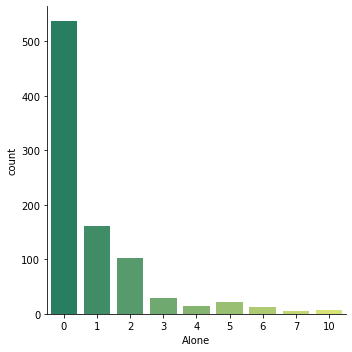

In [30]:
# Visualizations for the column just made

sns.factorplot('Alone', data=titanic_df, kind='count', palette='summer')

### <font color='indianred'>**Q.** What are the factors behind the survival or  person?</font>

C:\Users\Ankit Panda\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ankit Panda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


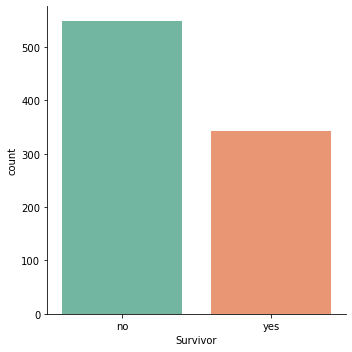

In [31]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'}) 

sns.factorplot('Survivor', kind='count', data=titanic_df, palette='Set2')

C:\Users\Ankit Panda\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ankit Panda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


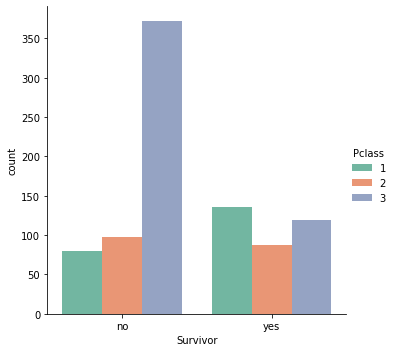

In [32]:
# Looking at the classes of the survivors.

sns.factorplot('Survivor', hue='Pclass', kind='count', data=titanic_df, palette='Set2')

C:\Users\Ankit Panda\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ankit Panda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


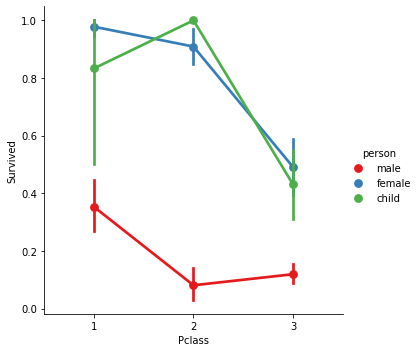

In [40]:
# Also making a plot of class vs survivors for better understanding

sns.factorplot('Pclass', 'Survived', hue='person', data=titanic_df, palette='Set1')

#### <font color='grey' face='Verdana'>A famous dialogue from the movie that "women and children first" can be seen in this graph as well, there were very less survival rates of males in all the classes</font>

C:\Users\Ankit Panda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


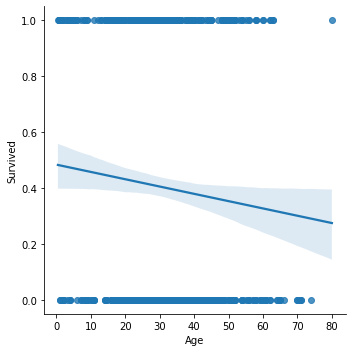

In [44]:
# Is age a factor in survival rates

sns.lmplot('Age', 'Survived', data=titanic_df)

**CONCLUSION DRAWN: <font color='indianred' face='Verdana'> The general trend that can be seen is the older people were less likely to survive in titanic disaster.</font>**

C:\Users\Ankit Panda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


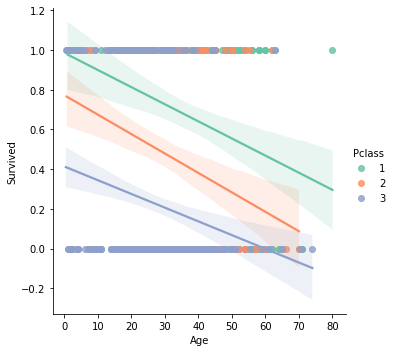

In [46]:
# Digging more to know what were the effect of classes and genders on survival rates

sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, palette='Set2')

C:\Users\Ankit Panda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


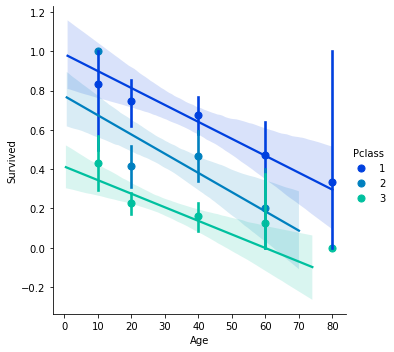

In [48]:
# Getting rid of the points and merging them with generations argument just to clear up the figures

generations = [10,20,40,60,80] 

sns.lmplot('Age', 'Survived', data=titanic_df, hue='Pclass', palette='winter', x_bins=generations)

C:\Users\Ankit Panda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


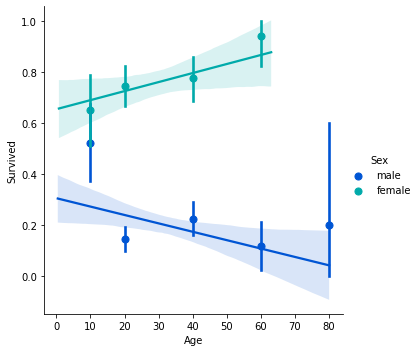

In [52]:
# What role gender plays in the survival

sns.lmplot('Age', 'Survived', hue='Sex', data=titanic_df, palette='winter', x_bins=generations)

**CONCLUSION DRAWN: <font color='indianred' face='Verdana'> The general trend that can be seen is older females were very likely to survive in titanic disaster than older males.</font>**

**Two important questions that can be asked are:**

- <font color='green'>Did the deck have an effect of passengers survival rates?</font>
- <font color='green'>Did having a family member increases the odd of surviving the crash?</font>

In [55]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0,no
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,0,no
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,0,no
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,4,no
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,2,yes
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,1,yes


C:\Users\Ankit Panda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


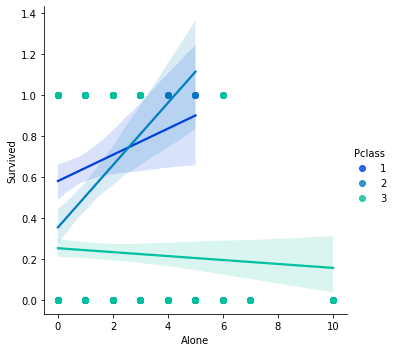

In [58]:
sns.lmplot('Alone', 'Survived', hue='Pclass', data=titanic_df, palette='winter')

**CONCLUSION DRAWN: <font color='green' face='Verdana'> Having a family member in upper classes increased the chances of survival as compared to having family in lower class.</font>**

**CONCLUSION DRAWN: <font color='green' face='Verdana'> The best chances of survival for people in 3rd class were if they were travelling alone.</font>**